In [1]:
import pandas as pd
# ensure that all columns are shown and that colum content is not cut
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width',1000)
pd.set_option('display.max_rows', 500) # ensure that all rows are shown

# `BalanceSheetStandardizer`

In the `07_00_stanardizer_basics.ipynb` we looked at the basic principles of the standardizer. And now we are going to explore the details of the `BalanceSheetStandardizer`.

## Main Goal
The main Goal of the `BalanceSheetStandardizer` is to provide a consilidated, standardized view that contains the main positions of a balance sheet.

The current implementation tries to find/calculate the values for the following positions:

- Assets
    - AssetsCurrent
        - Cash
    - AssetsNoncurrent
- Liabilities
    - LiabilitiesCurrent
    - LiabilitiesNoncurrent
- Equity
    - HolderEquity (mainly StockholderEquity or PartnerCapital)
        - RetainedEarnings
        - AdditionalPaidInCapital
        - TreasuryStockValue
    - TemporaryEquity
    - RedeemableEquity
- LiabilitiesAndEquity


## Prepare the dataset

As input, we are going to use the dataset which was created with the `06_bulk_data_processing_deep_dive.ipynb`. That dataset contains all available data for balance sheets. The path to this dataset - on my machine - is either `set/parallel/BS/joined` or `set/serial/BS/joined` depending whether it was produced with the faster parallel or slower serial processing approach.

The data is already filtered for 10-K and 10-Q reports. Moreover, the following filters were applied as well: `ReportPeriodRawFilter`, `MainCoregRawFilter`, `OfficialTagsOnlyRawFilter`, `USDOnlyRawFilter`. The dataset is already joined, so we can use it directly with the `BalanceSheetStandardizer`.

Of course, if you prefer another dataset, for instance all data of a few companies, feel free to do so.

In [26]:
from secfsdstools.d_container.databagmodel import JoinedDataBag
from secfsdstools.f_standardize.bs_standardize import BalanceSheetStandardizer

all_bs_joinedbag:JoinedDataBag = JoinedDataBag.load(target_path="set/parallel/BS/joined")
bs_standardizer = BalanceSheetStandardizer()

# standardize the data
all_bs_joinedbag.present(bs_standardizer)

C:\ieu\Anaconda3\envs\secanalyzing\lib\site-packages\secfsdstools\f_standardize\base_rule_framework.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  log_df[self.identifier] = False
C:\ieu\Anaconda3\envs\secanalyzing\lib\site-packages\secfsdstools\f_standardize\base_rule_framework.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  log_df[self.identifier] = False


tag,adsh,coreg,report,ddate,uom,Assets,AssetsCurrent,AssetsNoncurrent,Liabilities,LiabilitiesCurrent,LiabilitiesNoncurrent,HolderEquity,TemporaryEquity,RedeemableEquity,Equity,LiabilitiesAndEquity,Cash,RetainedEarnings,AdditionalPaidInCapital,TreasuryStockValue,AssetsCheck_error,AssetsCheck_cat,LiabilitiesCheck_error,LiabilitiesCheck_cat,EquityCheck_error,EquityCheck_cat,AssetsLiaEquCheck_error,AssetsLiaEquCheck_cat
0,0000002178-11-000032,,3,20110630,USD,3.593880e+08,2.865200e+08,7.286800e+07,2.600610e+08,2.512960e+08,8.765000e+06,9.932700e+07,0.0,0.0,9.932700e+07,3.593880e+08,27939000.0,87212000.0,11693000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000002178-11-000049,,3,20110930,USD,3.535870e+08,2.756010e+08,7.798600e+07,2.452340e+08,2.311140e+08,1.412000e+07,1.083530e+08,0.0,0.0,1.083530e+08,3.535870e+08,49560000.0,96238000.0,11693000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000002178-12-000010,,2,20111231,USD,3.788400e+08,3.049650e+08,7.387500e+07,2.681580e+08,2.560940e+08,1.206400e+07,1.106820e+08,0.0,0.0,1.106820e+08,3.788400e+08,37066000.0,98567000.0,11693000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000002178-12-000026,,3,20120331,USD,4.125340e+08,3.269200e+08,8.561400e+07,2.952770e+08,2.828150e+08,1.246200e+07,1.172570e+08,0.0,0.0,1.172570e+08,4.125340e+08,35989000.0,105142000.0,11693000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000002178-12-000037,,4,20120630,USD,3.440350e+08,2.497470e+08,9.428800e+07,2.213920e+08,2.083550e+08,1.303700e+07,1.226430e+08,0.0,0.0,1.226430e+08,3.440350e+08,32213000.0,110528000.0,11693000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319587,0001971213-23-000019,,2,20230630,USD,6.201000e+09,1.506000e+09,4.695000e+09,5.560000e+09,6.240000e+08,4.936000e+09,6.410000e+08,0.0,0.0,6.410000e+08,6.201000e+09,728000000.0,184000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319588,0001973047-23-000016,,2,20230731,USD,3.366300e+04,6.460000e+02,3.301700e+04,4.148700e+04,4.148700e+04,0.000000e+00,-7.824000e+03,0.0,0.0,-7.824000e+03,3.366300e+04,646.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319589,0001974138-23-000008,,4,20230630,USD,5.736000e+09,1.676000e+09,4.060000e+09,2.415000e+09,1.795000e+09,6.200000e+08,3.321000e+09,0.0,0.0,3.321000e+09,5.736000e+09,337000000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319590,0001974793-23-000004,,2,20230630,USD,1.405810e+08,1.405810e+08,0.000000e+00,3.796100e+07,8.460000e+05,3.711500e+07,1.026200e+08,0.0,0.0,1.026200e+08,1.405810e+08,89275000.0,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


At first, we will save the results, including all the logs, so that we can use it directly in the future, without the need to process it again.<br>
**Note:** you need to create the target directory before storing the data

In [6]:
import os
target_path = "standardized/BS"
os.makedirs(target_path, exist_ok=True)

bs_standardizer.get_standardize_bag().save(target_path)

## Load the dataset
Once the data has been processed and saved, you can load it directly.

In [2]:
from secfsdstools.f_standardize.standardizing import StandardizedBag

bs_standardizer_result_bag = StandardizedBag.load("standardized/BS")

C:\ieu\Anaconda3\envs\secanalyzing\lib\site-packages\secfsdstools\f_standardize\standardizing.py:81: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  applied_rules_sum_s = pd.read_csv(


## Overview

Before we dive into what the `BalanceSheetStandardizer` does in detail, lets get a first impression of the the produced data. First, let us see how many rows we have.

In [3]:
len(bs_standardizer_result_bag.result_df)

319592

Next, a good idea is to look at the `validation_overview_df`. This table gives an idea about the "quality" of the dateset based on the summary of the results of the applied validation rules.

In [4]:
bs_standardizer_result_bag.validation_overview_df

,AssetsCheck_cat,LiabilitiesCheck_cat,EquityCheck_cat,AssetsLiaEquCheck_cat,AssetsCheck_cat_pct,LiabilitiesCheck_cat_pct,EquityCheck_cat_pct,AssetsLiaEquCheck_cat_pct
0,314299,303072,298779,298544,98.34,94.83,93.49,93.41
1,329,2083,5985,6108,0.10,0.65,1.87,1.91
5,619,3377,3410,3447,0.19,1.06,1.07,1.08
10,484,2707,1392,1413,0.15,0.85,0.44,0.44
100,3861,8353,9160,9381,1.21,2.61,2.87,2.94


This seems to be quite ok, since we have around 95% of the data in the first two categories. As a reminder, Category 0 means it is an exact match, catagory 1 means that it is less than 1 percent off the expected value (see notebook `07_00_standardizer_basics.ipynb` for details.

Next, let's see how often which rule was applied. This gives an idea about how much "calculation" had to be done in order to create a standardized dataset. We can to this by looking at the `applied_rules_sum_s` pandas Series object.

In [7]:
bs_standardizer_result_bag.applied_rules_sum_s

0
tag                                                                          0
PRE_BS_PRE_#1_Assets/AssetsNoncurrent                                      123
PRE_BS_PRE_#2_Assets/AssetsCurrent                                           0
MAIN_1_BS_#1_BR_#1_Assets                                                  239
MAIN_1_BS_#1_BR_#2_Cash                                                 253222
MAIN_1_BS_#1_BR_#3_LiabilitiesAndEquity                                 314512
MAIN_1_BS_#1_BR_#4_RetainedEarnings                                     282340
MAIN_1_BS_#2_EQ_#1_HolderEquity                                          85609
MAIN_1_BS_#2_EQ_#2_HolderEquity                                           9449
MAIN_1_BS_#2_EQ_#3_HolderEquity                                         217674
MAIN_1_BS_#2_EQ_#4_TemporaryEquity                                       10724
MAIN_1_BS_#2_EQ_#5_RedeemableEquity                                       8500
MAIN_1_BS_#2_EQ_#6_Equity                         

## Applied Rules
To be able to assess the content of `applied_rules_sum_s`  we need to understand the rules that are applied. The simplest way to do this is to print the description of them:

In [8]:
bs_standardizer_result_bag.process_description_df

,part,type,ruleclass,identifier,description
0,PRE,Group,,PRE_BS_PRE,
1,PRE,Rule,PreSumUpCorrection,PRE_BS_PRE_#1_Assets/AssetsNoncurrent,"Swaps the values between the tag 'Assets' and 'AssetsNoncurrent' if the following equation is True ""'AssetsNoncurrent' = 'Assets' + 'AssetsCurrent"" and 'AssetsCurrent' > 0"
2,PRE,Rule,PreSumUpCorrection,PRE_BS_PRE_#2_Assets/AssetsCurrent,"Swaps the values between the tag 'Assets' and 'AssetsCurrent' if the following equation is True ""'AssetsCurrent' = 'Assets' + 'AssetsNoncurrent"" and 'AssetsNoncurrent' > 0"
3,MAIN,Group,,MAIN_BS,
4,MAIN,Group,,MAIN_BS_#1_BR,
5,MAIN,Rule,CopyTagRule,MAIN_BS_#1_BR_#1_Assets,Copies the values from AssetsNet to Assets if AssetsNet is not null and Assets is nan
6,MAIN,Rule,CopyTagRule,MAIN_BS_#1_BR_#2_Cash,Copies the values from CashAndCashEquivalentsAtCarryingValue to Cash if CashAndCashEquivalentsAtCarryingValue is not null and Cash is nan
7,MAIN,Rule,CopyTagRule,MAIN_BS_#1_BR_#3_LiabilitiesAndEquity,Copies the values from LiabilitiesAndStockholdersEquity to LiabilitiesAndEquity if LiabilitiesAndStockholdersEquity is not null and LiabilitiesAndEquity is nan
8,MAIN,Rule,CopyTagRule,MAIN_BS_#1_BR_#4_RetainedEarnings,Copies the values from RetainedEarningsAccumulatedDeficit to RetainedEarnings if RetainedEarningsAccumulatedDeficit is not null and RetainedEarnings is nan
9,MAIN,Group,,MAIN_BS_#2_EQ,


Let's discuss a few of the rules in detail:
- **PRE_BS_PRE_#1_Assets/AssetsNoncurrent**<br> is a preprocess correction rule. There are actually about 120 reports in which the tags for Assets and AssetsNoncurrent were swapped. 
- **MAIN_BS_#1_BR_#1_Assets**<br> Most of the reports use the Assets tag. However, there are about 240 reports who use the AssetsNet tag. If this is the case, the value is copied to the Assets column.
- **MAIN_BS_#1_BR_#2_Cash, MAIN_BS_#1_BR_#3_LiabilitiesAndEquity, MAIN_BS_#1_BR_#4_RetainedEarnings** <br> These are mainly "renaming" rules, to have a shorter term. 
- **MAIN_BS_#2_EQ_#1_HolderEquity, MAIN_BS_#2_EQ_#2_HolderEquity, MAIN_BS_#2_EQ_#3_HolderEquity** <br> This rules ensures the precedence is considered when it comes to tags, that can contain the stockholderequity or the partnercapital. This are mainly three different tags, that have to be considered: StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest, StockholdersEquity, and PartnerCapital. Generally, it is either PartnerCapital or some kind of stockholderequity. Furthermore, StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest and StockholdersEquity can appear together. If they do appear together, StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest has precedence over StockholdersEquity, since StockholdersEquity is a child tag of StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest. As you can see in the `applied_rules_sum_s` data, two thirds of the entries have only StockholdersEquity present, one quarter has StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest present, and a few thousands have PartnerCapital set.
- **MAIN_BS_#2_EQ_#4_TemporaryEquity, MAIN_BS_#2_EQ_#5_RedeemableEquity**<br> Sometimes, Equity does not only include HolderEquity, but also TemporaryEquity and/or RedeemableEquity. Both of them have several tags that can define values which belongs to these catagories. So these two rules sum up all possible values for Temporary- and RedeemableEquity.
- **MAIN_BS_#2_EQ_#6_Equity** <br> The sum of HolderEquity, TemporaryEquity, and RedeemableEquity. Most of the time (90%) just HodlerEquity is present
- **MAIN_BS_#3_SC_#1_Assets, MAIN_BS_#3_SC_#2_AssetsCurrent, MAIN_BS_#3_SC_#2_AssetsNonurrent** (and the same for Liabilities) <br> If just one of the three (Assets, AssetsCurrent, and AssetsNoncurrent) the missing one is calculated based on the rule: Assets = AssetsCurrent + AssetsNoncurrent
- **MAIN_BS_#3_SC_#7_Assets, MAIN_BS_#3_SC_#8_Liabilities, MAIN_BS_#3_SC_#12_Equity** <br> If just one of Assets, Liabilities, and Equity is missing, it is calculated based on Assets = Liabilities + Equity
- **MAIN_BS_#4_SU_#3_LongTermDebt, MAIN_BS_#4_SU_#4_LiabilitiesNoncurrent** <br> Both rules are used to calculate LiabilitiesNoncurrent, if it is not contained directly, or if it wasn't possible to calculate it with one of the previous rules. As you can see from the `applied_rules_sum_s` many reports do not have an entry for LiabilitiesNoncurrent (in about 50% of the reports, it was possible to calculate it with rule MAIN_1_BS_#3_SC_#6_LiabilitiesNoncurrent, based on Liabilities and LiabilitiesCurrent and in about 15% of the cases it was possible to calculate it with these rules.
- **SetSumIfOnlyOneSummand Rules** <br> After applying the previous rules, we fill still empty Assets with either the value of AssetsCurrent or AssetsNoncurrent, if one of them is present. (same applies for Liabilities). So we kinda assume if there is only AssetsCurrent, and no AssetsNoncurrent, that there is actually no AssetsNoncurrent and hence, Assets equals AssetsCurrent and AssetsNoncurrent is 0.0.
- **PostCopyToFirstSummand Rules** <br> if there is just a value for Assets, but none for AssetsCurrent and AssetsNoncurrent, we assume that there is only AssetsCurrent. The value from Assets is copied into AssetsCurrent and AssetsNoncurrent is set to 0 (same for Liabilities).
- **PostSetToZero Rules** <br> These rules simply set nan values for different colums to 0.0.

### Overview on applied rules
It might be interesting to know how many rules are applied in general per report. In this example, we just look at the MAIN and PRE rules:

In [3]:
# just use a shorter variable name
df=bs_standardizer_result_bag.applied_rules_log_df

# we are just interested in the MAIN and PRE rules
filtered_columns = df.columns[df.columns.str.contains('MAIN|PRE')]

# count how many True values are in each row
df['count_true_values'] = df[filtered_columns].sum(axis='columns')

df.count_true_values.value_counts().sort_index()

0        167
1        288
2       1081
3       4654
4      12450
5      47329
6      45330
7     104330
8      80691
9      21860
10      1379
11        33
Name: count_true_values, dtype: int64

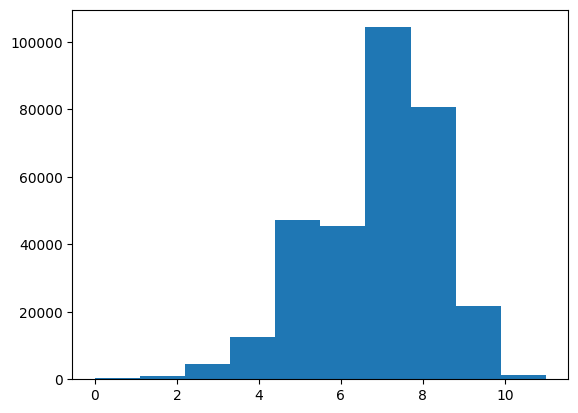

In [5]:
import matplotlib.pyplot as plt

plt.hist(df.count_true_values)

# Show the plot
plt.show()

### Showing the applied rules for a specific report number
If we analys a single report and want to know which rules were applied, we can do that with the following code:

In [7]:
apple_10k_2022 = "0000320193-22-000108"
apple_10k_2022_applied_rules_log_df = bs_standardizer_result_bag.applied_rules_log_df[bs_standardizer_result_bag.applied_rules_log_df.adsh==apple_10k_2022]

# just filter for the applied MAIN rules
main_rule_cols =  df.columns[df.columns.str.contains('MAIN')]
main_rule_df = apple_10k_2022_applied_rules_log_df[main_rule_cols]

# get the applied rules, by using the True and False values of main_rule_df.iloc[0] as a mask on the columns index
main_rule_df.columns[main_rule_df.iloc[0]].tolist()

['MAIN_1_BS_#1_BR_#2_Cash',
 'MAIN_1_BS_#1_BR_#3_LiabilitiesAndEquity',
 'MAIN_1_BS_#1_BR_#4_RetainedEarnings',
 'MAIN_1_BS_#2_EQ_#3_HolderEquity',
 'MAIN_1_BS_#2_EQ_#6_Equity',
 'MAIN_1_BS_#4_SU_#3_LongTermDebt']

# Analysis on the whole dataset
The following anylisys examples are just some ideas to shwo, what we can do now with the whole dataset.

First let us have a look at the distribution of Equity with a box plot.

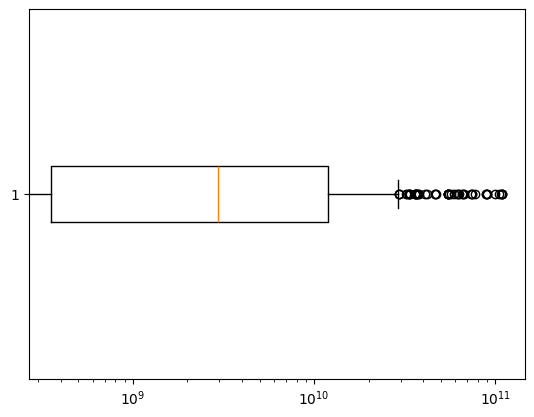

In [23]:
data = bs_standardizer_result_bag.result_df.Equity[:1000]

#plt.hist(data, bins=1000, color='blue', edgecolor='black')
plt.boxplot(data, vert=False)
plt.xscale('log') # using a logarithmic scale, we will lose negativ values though

Let's figure out, which report has the most Equity and then try to show the history of the Equity for that company which filed that report.

In [25]:
bs_standardizer_result_bag.result_df[bs_standardizer_result_bag.result_df.Equity == bs_standardizer_result_bag.result_df.Equity.max()]

tag,adsh,coreg,report,ddate,uom,Assets,AssetsCurrent,AssetsNoncurrent,Liabilities,LiabilitiesCurrent,LiabilitiesNoncurrent,HolderEquity,TemporaryEquity,RedeemableEquity,Equity,LiabilitiesAndEquity,Cash,RetainedEarnings,AdditionalPaidInCapital,TreasuryStockValue,AssetsCheck_error,AssetsCheck_cat,LiabilitiesCheck_error,LiabilitiesCheck_cat,EquityCheck_error,EquityCheck_cat,AssetsLiaEquCheck_error,AssetsLiaEquCheck_cat
99408,0001140361-11-038595,,2,20110630,USD,4.831333e+12,4.831333e+12,0.0,4.132105e+12,4.132105e+12,0.0,6.992280e+11,0.0,0.0,6.992280e+11,4.831333e+12,2.785681e+11,1.986414e+10,5.335573e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We get the details of the report from the `all_bs_joinedbag` that we laoded at the beginning. Of course, we use the SingleReportReader to get a bag with just the data of that report. The information we need is the CIK which is in the sub_df.

In [27]:
all_bs_joinedbag.sub_df[all_bs_joinedbag.sub_df.adsh == '0001140361-11-038595']

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,baph,countryma,stprma,cityma,zipma,mas1,mas2,countryinc,stprinc,ein,former,changed,afs,wksi,fye,form,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
233679,0001140361-11-038595,1115055,PINNACLE FINANCIAL PARTNERS INC,6021.0,US,TN,NASHVILLE,37201,150 THIRD AVENUE SOUTH,SUITE 900,6157443700,US,TN,NASHVILLE,37201,150 THIRD AVENUE SOUTH,SUITE 900,US,TN,621812853.0,None,NaN,2-ACC,0,1231,10-Q,20110630,2011.0,Q2,20110729,2011-07-29 17:30:00.0,0,0,pnfp-20110630.xml,1,None


Next, get the adshs of the reports for this company and filter our standardized balance sheet data for it.

In [37]:
adshs_for_1115055 = all_bs_joinedbag.sub_df[all_bs_joinedbag.sub_df.cik == 1115055].adsh.to_list()
df = bs_standardizer_result_bag.result_df[bs_standardizer_result_bag.result_df.adsh.isin(adshs_for_1115055)][['ddate', 'Equity']]

In order to visualize, we create a date column out of the ddate (which is an integer).

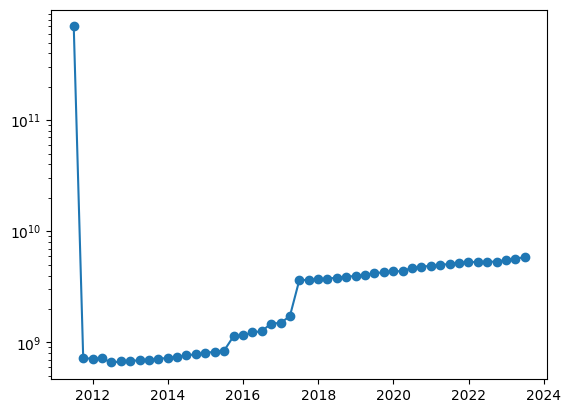

In [39]:
df['date'] = pd.to_datetime(df['ddate'], format='%Y%m%d')

df = df.sort_values(by='date')

# Plotting
plt.plot(df['date'], df['Equity'], marker='o', linestyle='-')
plt.yscale('log')

The first data point is obviously faulty

lets repeat the stpes for apple -> cik 320193

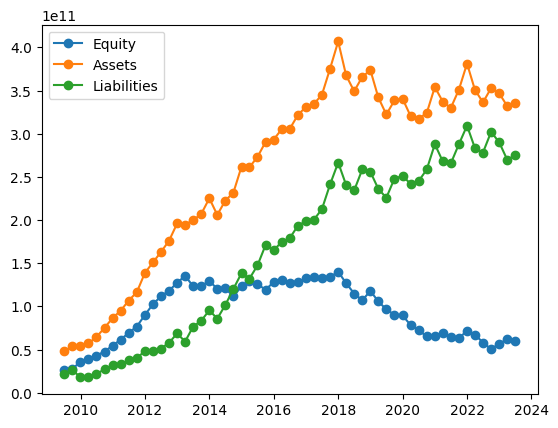

In [44]:
adshs_for_apple = all_bs_joinedbag.sub_df[all_bs_joinedbag.sub_df.cik == 320193].adsh.to_list()
df = bs_standardizer_result_bag.result_df[bs_standardizer_result_bag.result_df.adsh.isin(adshs_for_apple)][['ddate', 'Equity','Assets','Liabilities']]

df['date'] = pd.to_datetime(df['ddate'], format='%Y%m%d')

df = df.sort_values(by='date')

# Plotting
plt.plot(df['date'], df['Equity'], label='Equity', marker='o', linestyle='-')
plt.plot(df['date'], df['Assets'], label='Assets', marker='o', linestyle='-')
plt.plot(df['date'], df['Liabilities'], label='Liabilities', marker='o', linestyle='-')
plt.legend()


## Merging with information from the sub_df
We often want to analyze data for a single company, or compare companies. Therefore, we should have the company information in the dataset. Moreover, it makes sense to also include whether it is a 10-K or 10-Q report. And also the name, the financial year ending, the financial year and the financial period are meaningful values.

So let us merge this information and also create a date column based on ddate value. Also sort the dataframe by date.

In [53]:
data_to_merge_df = all_bs_joinedbag.sub_df[['adsh', 'cik', 'name', 'form', 'fye', 'fy', 'fp']]

merged_df = pd.merge(data_to_merge_df, bs_standardizer_result_bag.result_df, on='adsh', how='left')

# create the date column and sort by date
merged_df['date'] = pd.to_datetime(merged_df['ddate'], format='%Y%m%d')
merged_df = merged_df.sort_values(by='date')
merged_df[:4]

,adsh,cik,name,form,fye,fy,fp,coreg,report,ddate,uom,Assets,AssetsCurrent,AssetsNoncurrent,Liabilities,LiabilitiesCurrent,LiabilitiesNoncurrent,HolderEquity,TemporaryEquity,RedeemableEquity,Equity,LiabilitiesAndEquity,Cash,RetainedEarnings,AdditionalPaidInCapital,TreasuryStockValue,AssetsCheck_error,AssetsCheck_cat,LiabilitiesCheck_error,LiabilitiesCheck_cat,EquityCheck_error,EquityCheck_cat,AssetsLiaEquCheck_error,AssetsLiaEquCheck_cat,date
306685,0001096906-21-001168,1089297,NOVAGANT CORP,10-K,1231,2004.0,FY,,2.0,20041231.0,USD,0.0,0.0,0.0,91457.0,91457.0,0.0,-91457.0,0.0,0.0,-91457.0,0.0,0.0,-18327798.0,18214341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004-12-31
306686,0001096906-21-001172,1089297,NOVAGANT CORP,10-K,1231,2005.0,FY,,2.0,20051231.0,USD,0.0,0.0,0.0,91457.0,91457.0,0.0,-91457.0,0.0,0.0,-91457.0,0.0,0.0,-18327798.0,18214341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-12-31
306689,0001096906-21-001180,1089297,NOVAGANT CORP,10-K,1231,2006.0,FY,,2.0,20061231.0,USD,0.0,0.0,0.0,91457.0,91457.0,0.0,-91457.0,0.0,0.0,-91457.0,0.0,0.0,-18327798.0,18214341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-12-31
306690,0001096906-21-001182,1089297,NOVAGANT CORP,10-K,1231,2007.0,FY,,2.0,20071231.0,USD,0.0,0.0,0.0,91457.0,91457.0,0.0,-91457.0,0.0,0.0,-91457.0,0.0,0.0,-18327798.0,18214341.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-12-31


let's visualize and compare the history of the euqity for a few companies:

In [58]:
# first, create a cik-name look up table, so that we can use the name in the plot
df_latest = merged_df.sort_values('date').drop_duplicates('cik', keep='last')
# Create the dictionary
cik_name_dict = dict(zip(df_latest['cik'], df_latest['name']))

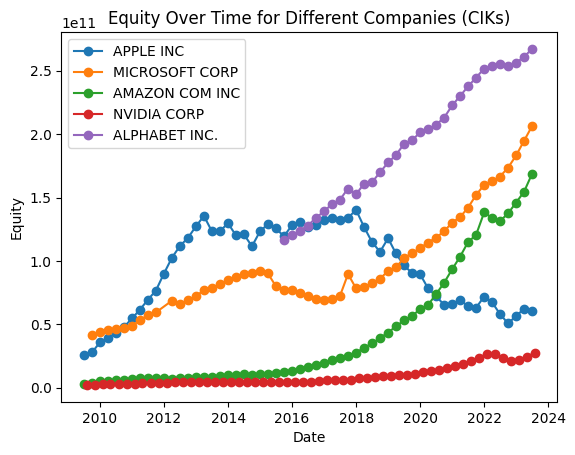

In [61]:
ciks_to_consider = [320193, 789019, 1652044, 1045810, 1018724] # Apple, Microsoft, Alphabet, nvidia, Amazon

df = merged_df[merged_df.cik.isin(ciks_to_consider)].copy()

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by 'cik' and plot equity for each group
for cik, group in df.groupby('cik'):
    plt.plot(group['date'], group['Equity'], label=f'{cik_name_dict[cik]}', marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Over Time for Different Companies (CIKs)')

# Display legend
plt.legend()

Cloud providers seem to do exceptionally well these days..


# Conclusion

With the Balance Sheet Standardizer, we have the possibility to actually compare data between companies and also to create input for ML models. 

The great thing is, that we can do this with official and free data for over 300'000 reports filed by about 14'000 companies since 2010.

Thanks to secfsdstools package, we have the possibility to gather and filter the data in simple and efficient way, which otherwise would only be possible if you pay for the data.

The Standardizer framework is simple and can be extended with additional rules, in order to make other data points available. With the validation rules we also have a way to assess the quality of single rows in the dataset.

Of course, calculating financial ratios based on the standardized dataset is really simple now.

Also the size of the standardized dataset (about 30MB) is really easy to handle.